In [ ]:
# 1.	Load the basic libraries and packages

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# 2.	Load the dataset

dataset = datasets.load_iris()
X = dataset.data[:, :2]
y = dataset.target

In [ ]:
# 3. Analyse the dataset

print("Feature Data (First 5 rows):\n", X[:5])
print("Target Classes (First 5 rows):\n", y[:5])
print("Unique Target Classes:", set(y))

Feature Data (First 5 rows):
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
Target Classes (First 5 rows):
 [0 0 0 0 0]
Unique Target Classes: {0, 1, 2}


In [ ]:
# 4. Normalize the data

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# 5. Pre-process the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 6. Load Different Support Vector classifiers

linear_svc = svm.SVC(kernel='linear', C=1)
polynomial_svc = svm.SVC(kernel='poly', degree=5, C=1)
rbf_svc = svm.SVC(kernel='rbf', C=1, gamma=0.5)

In [ ]:
# 7. Train the classifier

linear_svc.fit(X_train, y_train)
polynomial_svc.fit(X_train, y_train)
rbf_svc.fit(X_train, y_train)

SVC(C=1, gamma=0.5)

In [ ]:
# 8. Predict over the test dataset

models = {'Linear SVM': linear_svc, 'Polynomial SVM': polynomial_svc, 'RBF SVM': rbf_svc}
predictions = {name: model.predict(X_test) for name, model in models.items()}

In [ ]:
# 9. Obtain the confusion matrix for each of the classifier outputs

for name, y_pred in predictions.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Linear SVM
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Polynomial SVM
Accuracy: 0.5333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.39      1.00      0.56         9
           2       1.00      0.18      0.31        11

    accuracy                           0.53        30
   macro avg       0.80      0.56      0.51        30
weighted avg       0.82      0.53      0.50        30

Confusion Matrix:
 [[5 5 0]
 [0 9 0]
 [0 9 2]]

RBF SVM
Accurac

Results

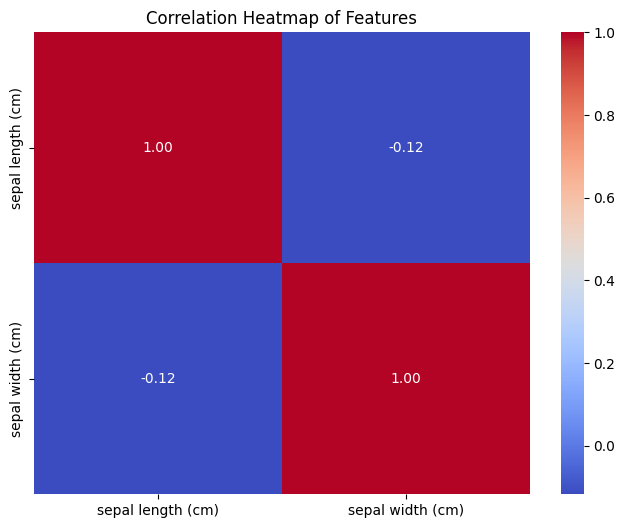

In [ ]:
# 1. Correlation Graph Between Features

selected_features = dataset.feature_names[:2]
df = pd.DataFrame(X, columns=selected_features)
plt.figure(figsize=(8, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()

In [ ]:
# 2. Confusion matrix and classification report for (i) RBF, (ii) Linear, and (iii) Polynomial

models = {'Linear SVM': linear_svc, 'Polynomial SVM': polynomial_svc, 'RBF SVM': rbf_svc}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Linear SVM
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Polynomial SVM
Accuracy: 0.5333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.39      1.00      0.56         9
           2       1.00      0.18      0.31        11

    accuracy                           0.53        30
   macro avg       0.80      0.56      0.51        30
weighted avg       0.82      0.53      0.50        30

Confusion Matrix:
 [[5 5 0]
 [0 9 0]
 [0 9 2]]

RBF SVM
Accurac

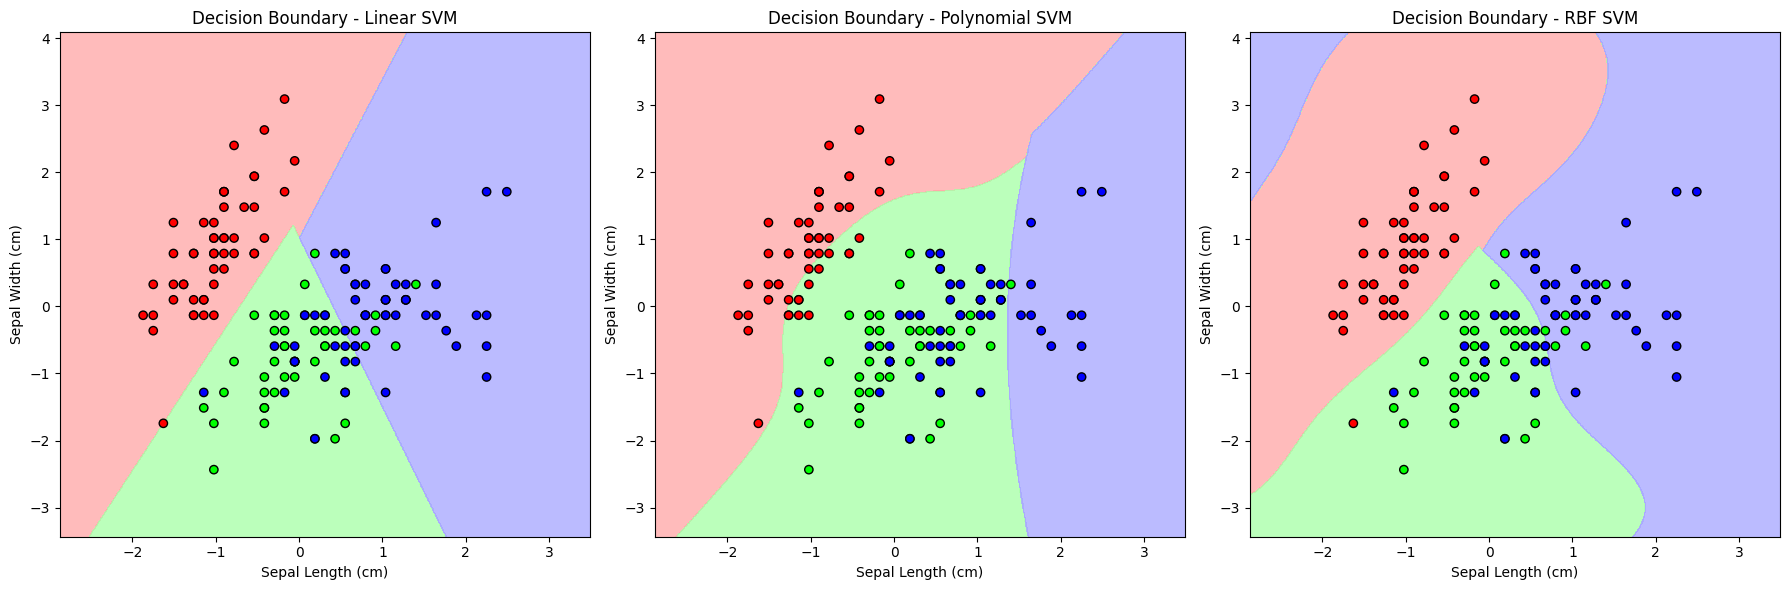

In [ ]:
# 3. Contour graph for different support vector classifiers

def plot_decision_boundary_subplot(X, y, models, titles):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for idx, (model, title, ax) in enumerate(zip(models, titles, axes)):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
        ax.set_title(title)
        ax.set_xlabel("Sepal Length (cm)")
        ax.set_ylabel("Sepal Width (cm)")

    plt.tight_layout()
    plt.show()

models = [linear_svc, polynomial_svc, rbf_svc]
titles = ["Decision Boundary - Linear SVM", "Decision Boundary - Polynomial SVM", "Decision Boundary - RBF SVM"]

plot_decision_boundary_subplot(X, y, models, titles)